In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
bikeShrng_df = pd.read_csv('day.csv')

In [3]:
bikeShrng_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikeShrng_df.shape

(730, 16)

In [5]:
bikeShrng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikeShrng_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikeShrng_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bikeShrng_df.size

11680

In [9]:
bikeShrng_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
bikeShrng_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#There are no missing / Null values either in columns or rows
#Remove the duplicates in the data
bikeShrng_df.drop_duplicates(subset=None, inplace=True)

In [12]:
bikeShrng_df.shape

(730, 16)

In [13]:
#Looks like no duplicates in the data
bikeShrng_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [14]:
#Cleaning the data
#creating new column days_old which indicates how old the business is
bikeShrng_df['days_old'] = (pd.to_datetime(bikeShrng_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [15]:
bikeShrng_df.head

<bound method NDFrame.head of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed 

In [16]:
#instant is only an index value, so we can remove it
bikeShrng_df.drop(['instant'],axis = 1, inplace=True)
bikeShrng_df.head


<bound method NDFrame.head of          dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0    01-01-2018       1   0     1        0        6           0           2   
1    02-01-2018       1   0     1        0        0           0           2   
2    03-01-2018       1   0     1        0        1           1           1   
3    04-01-2018       1   0     1        0        2           1           1   
4    05-01-2018       1   0     1        0        3           1           1   
..          ...     ...  ..   ...      ...      ...         ...         ...   
725  27-12-2019       1   1    12        0        4           1           2   
726  28-12-2019       1   1    12        0        5           1           2   
727  29-12-2019       1   1    12        0        6           0           2   
728  30-12-2019       1   1    12        0        0           0           1   
729  31-12-2019       1   1    12        0        1           1           2   

          temp     at

In [17]:
# Drop dteday as we have already have month and weekday columns
bikeShrng_df.drop(['dteday'], axis = 1, inplace = True)

In [18]:
bikeShrng_df.head

<bound method NDFrame.head of      season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        4           1           2  10.420847   
726       1   1    12        0        5           1           2  10.386653   
727       1   1    12        0        6           0           2  10.386653   
728       1   1    12        0        0           0           1  10.489153   
729       1   1    12        0        1           1           2   8.849153   

        atemp      hum  windspeed

In [19]:
# Drop casual and registered columnsa as as we have cnt column which is sum of the both

bikeShrng_df.drop(['casual'], axis = 1, inplace = True)
bikeShrng_df.drop(['registered'], axis = 1, inplace = True)
bikeShrng_df.head

<bound method NDFrame.head of      season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        4           1           2  10.420847   
726       1   1    12        0        5           1           2  10.386653   
727       1   1    12        0        6           0           2  10.386653   
728       1   1    12        0        0           0           1  10.489153   
729       1   1    12        0        1           1           2   8.849153   

        atemp      hum  windspeed

In [20]:
bikeShrng_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 79.8 KB


In [21]:
bikeShrng_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [22]:
### Handle Outliers
bikeShrng_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [23]:
#Print number of unique values in all columns
bikeShrng_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

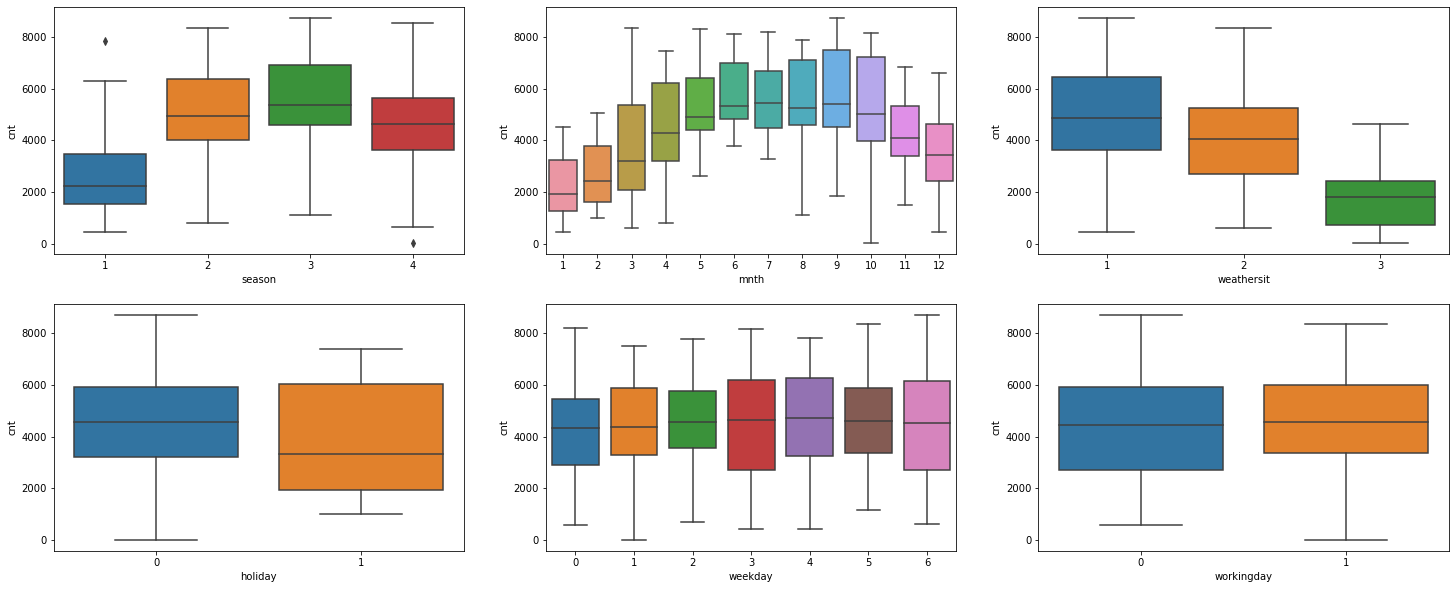

In [24]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeShrng_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeShrng_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeShrng_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeShrng_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeShrng_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeShrng_df)
plt.show()

In [25]:
#From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

EDA

In [26]:
#convert to categorical values
bikeShrng_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

In [27]:
bikeShrng_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

In [28]:
bikeShrng_df.mnth = bikeShrng_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [29]:
bikeShrng_df.weekday = bikeShrng_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [30]:
bikeShrng_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1440x1080 with 0 Axes>

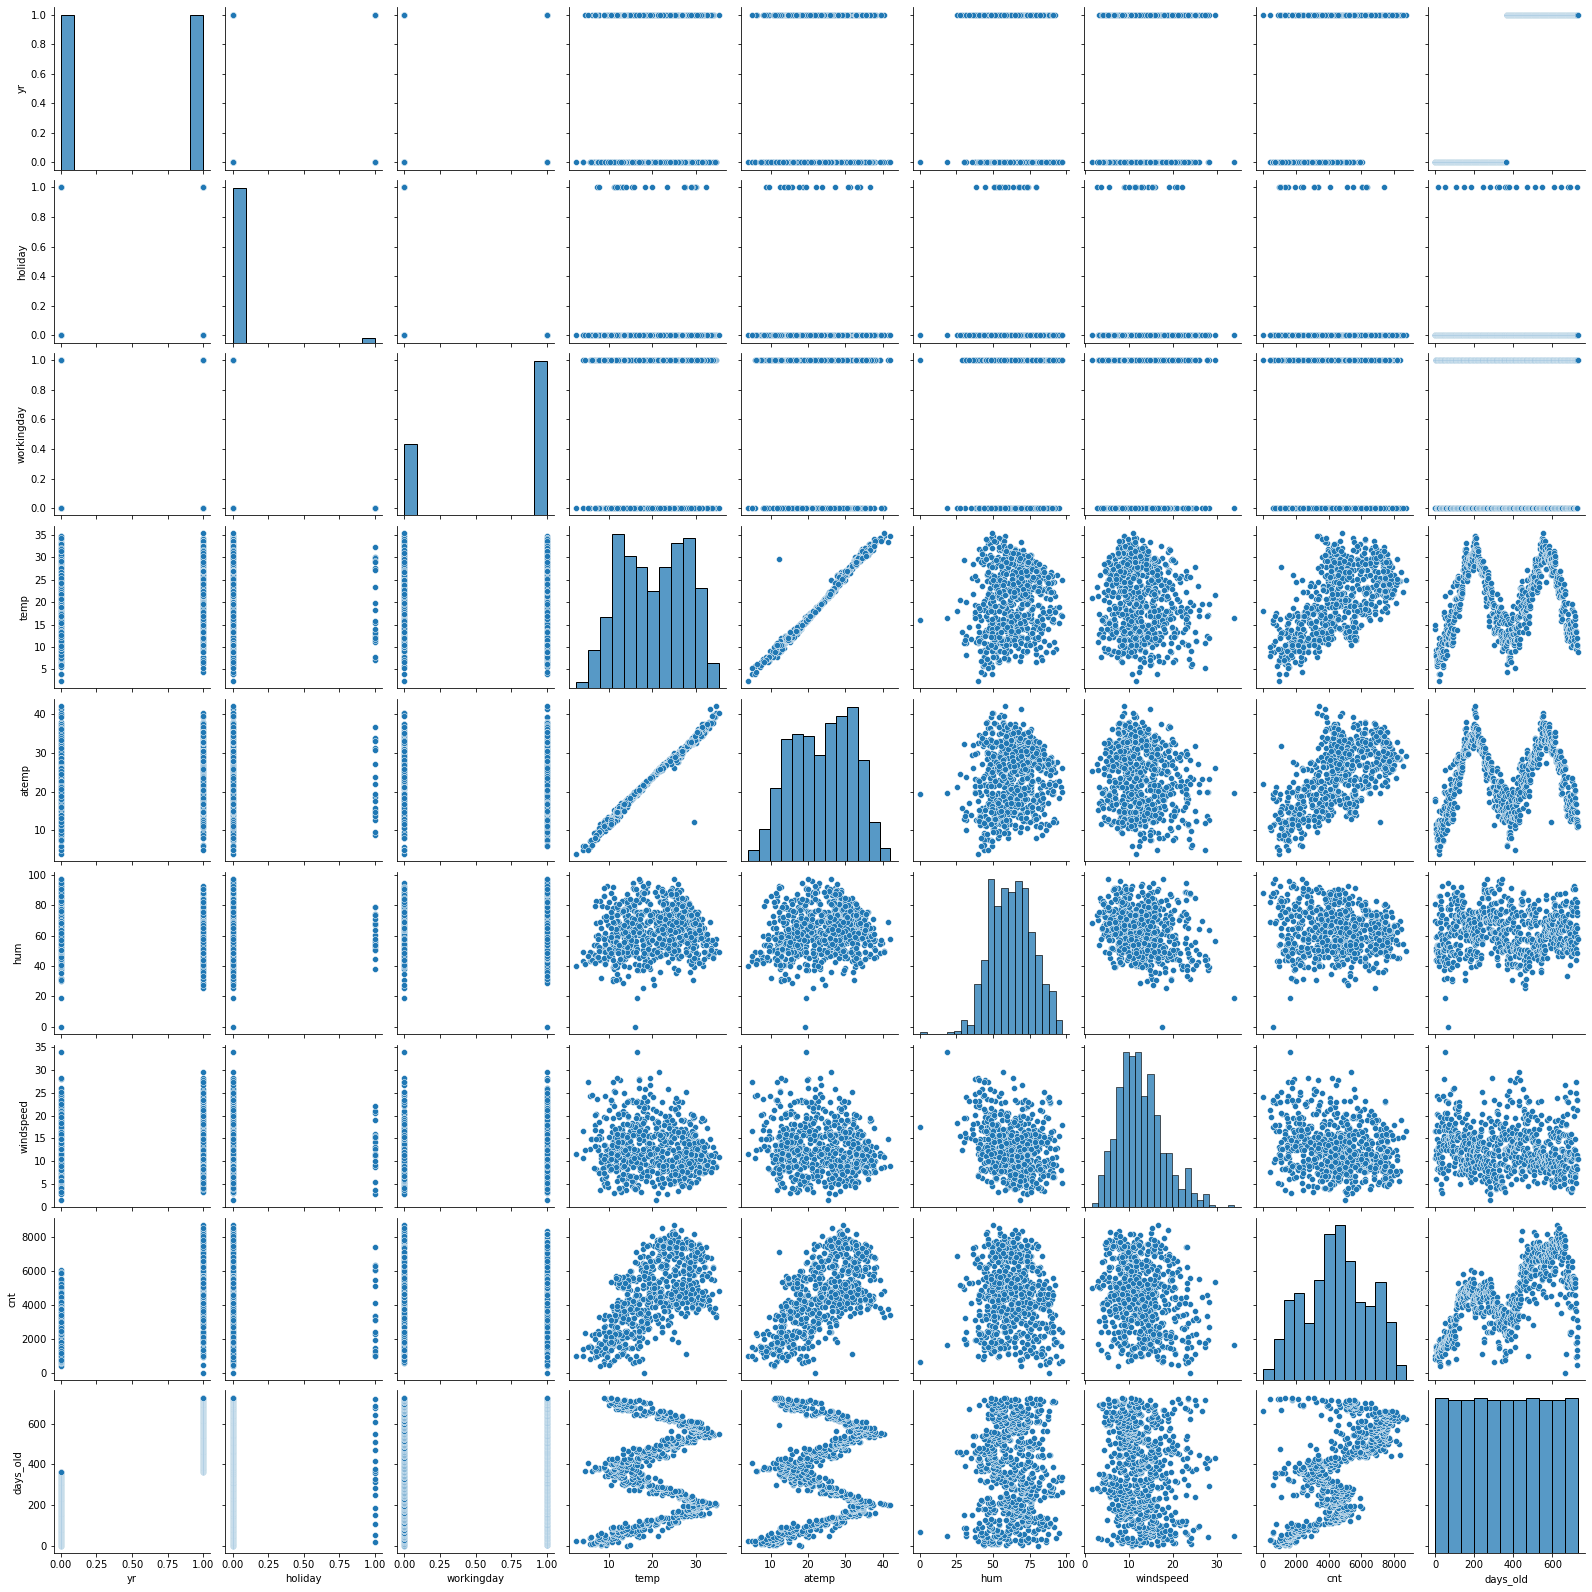

In [31]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeShrng_df)
plt.show()

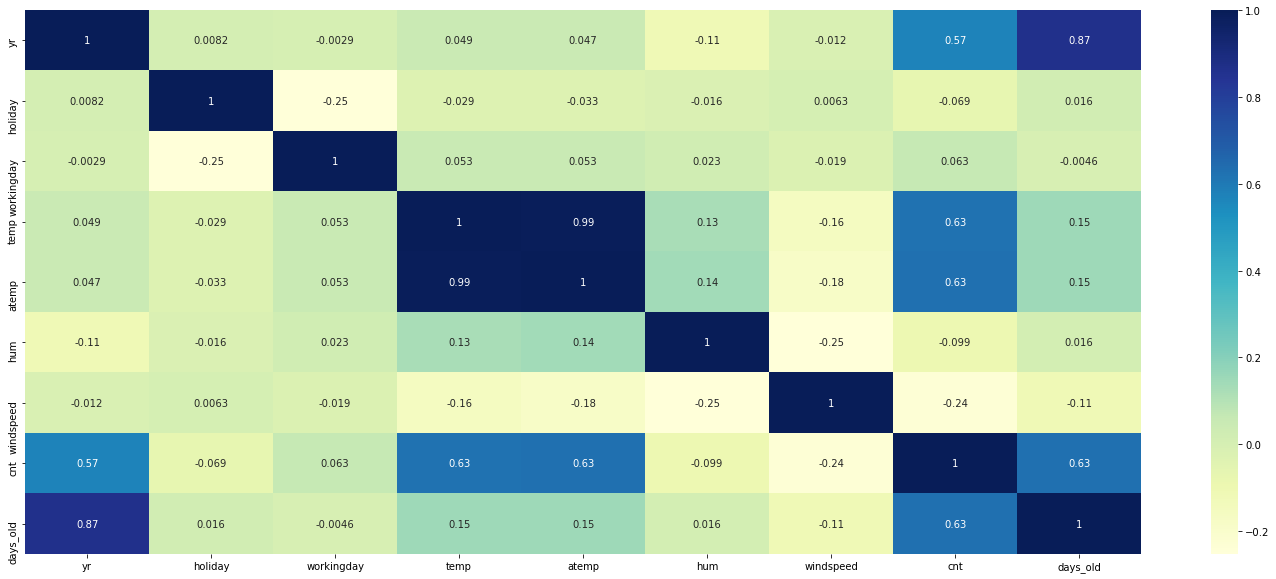

In [32]:
#check the correlation coefficients to see which variables are highly correlated
#Draw Heatmap of correlation
plt.figure(figsize=(25,10))
sns.heatmap(bikeShrng_df.corr(),annot=True, cmap='YlGnBu' )
plt.show()

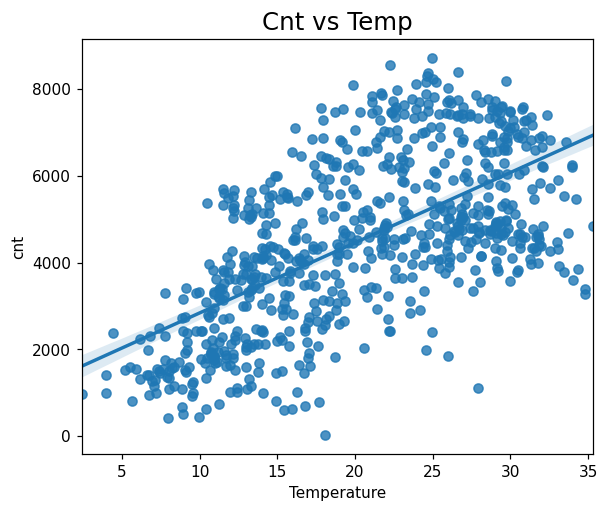

In [33]:
#From the correlation map, temp, atemp and days_old seems to be highly correlated
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeShrng_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Inference:
Demand for bikes is positively correlated to temp.
We can see that cnt is linearly increasing with temp indicating linear relation.

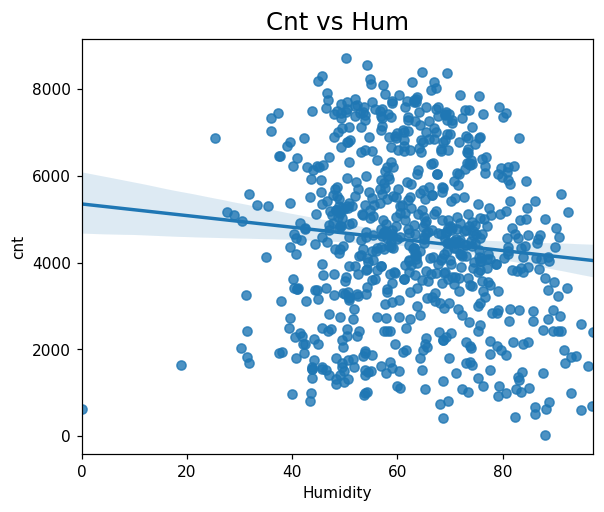

In [34]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeShrng_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

Inference:
Hum is values are more scattered around.
Although we can see cnt decreasing with increase in humidity.

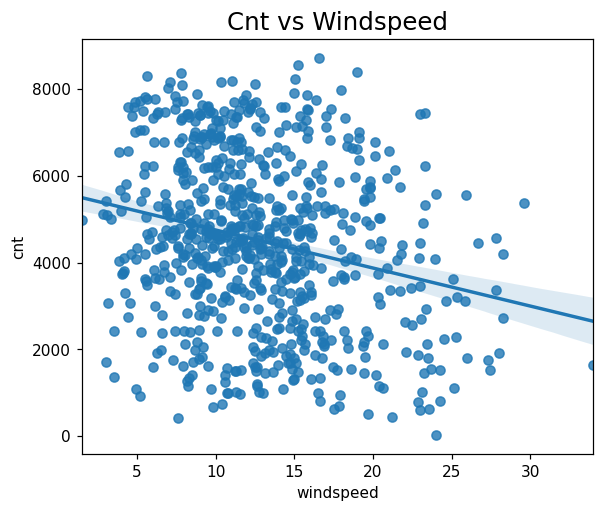

In [35]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeShrng_df,y="cnt",x="windspeed")
plt.show()

Inference:
Windspeed is values are more scattered around.
Although we can see cnt decreasing with increase in windspeed.

In [36]:
bikeShrng_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


Data Preparation for Linear Regression

In [37]:
bikeShrng_df = pd.get_dummies(data=bikeShrng_df,columns=["season","mnth","weekday"],drop_first=True)
bikeShrng_df = pd.get_dummies(data=bikeShrng_df,columns=["weathersit"])

In [38]:
#Print columns after creating dummies
bikeShrng_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [39]:
bikeShrng_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


Model Building

In [40]:
bikeShrng_df.shape

(730, 32)

In [41]:
#Split Data into training and test
#y to contain only target variable
y=bikeShrng_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bikeShrng_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


In [43]:
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


Feature Scaling continuous variables

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [45]:
#scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [46]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,0,0,1,0,0,1


In [47]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Build a Model using RFE 

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 10),
 ('mnth_jan', False, 9),
 ('mnth_jul', False, 14),
 ('mnth_jun', False, 8),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 6),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 12),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

Manual elimination

In [51]:
#Build a model using statsmodel api 
#Function takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [52]:
#Function to calculate VIFs and print them
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [53]:
X_train.columns[rfe.support_]
#Columns selected by RFE. we can use these columns for manual elimination

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [54]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [55]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [56]:
X_train_rfe.shape

(511, 15)

Build Model

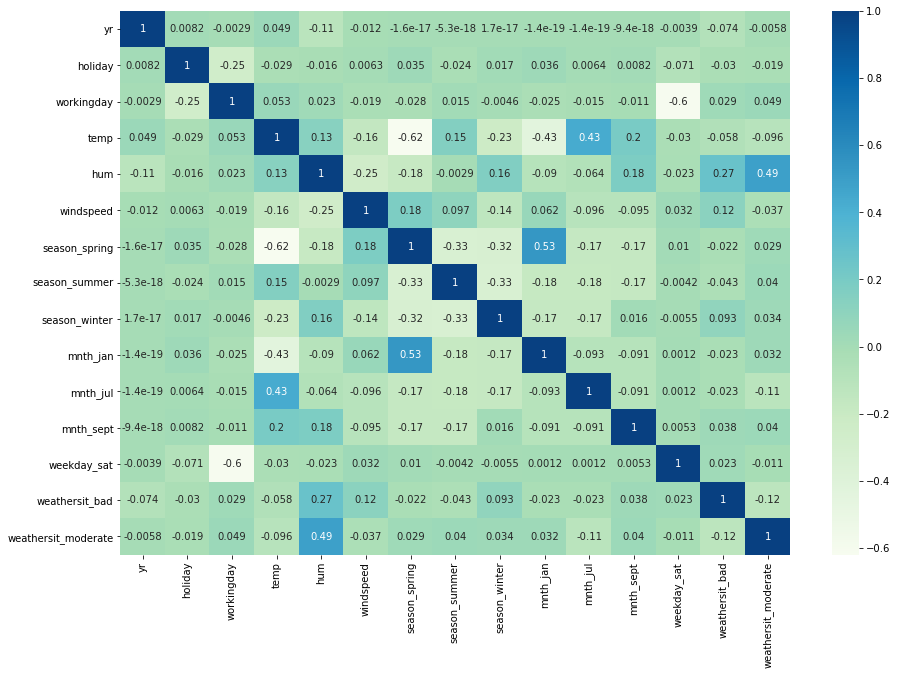

In [57]:
#Checking correlation of features selected by RFE with target column
plt.figure(figsize = (15,10))
sns.heatmap(bikeShrng_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

In [58]:
#Model 1 -Start with all variables selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.52e-183
Time:                        11:46:49   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

In [59]:
#Model 2 - Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.59e-184
Time:                        11:46:50   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

In [60]:
# Mode1 3 - Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.46e-181
Time:                        11:46:50   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

In [61]:
#Model 4 - Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.56e-182
Time:                        11:46:51   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

In [62]:
#Model 5 - Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.57e-182
Time:                        11:46:52   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

In [63]:
#Model 6- Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.84e-150
Time:                        11:46:52   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

In [64]:
##Model 7 - Replace spring with mnth_jul as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 11 May 2022   Prob (F-statistic):           3.93e-97
Time:                        11:46:52   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

In [65]:
# Model 8 - Dropping the variable windspeed as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          5.90e-146
Time:                        11:46:53   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

In [66]:
# Model 8 - Using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.32e-145
Time:                        11:46:53   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

In [67]:
#Model 9 - Adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.33e-179
Time:                        11:46:54   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

Inference:

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821
We can select Model 9 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic),
along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is veryless,
which also means that there are no additional parameters that can be removed from this model.

In [68]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [69]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1849.311114143623 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


Model Evaluation

Residucal Analysis

In [70]:
y_train_pred = lr.predict(X_train[cols])

In [71]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

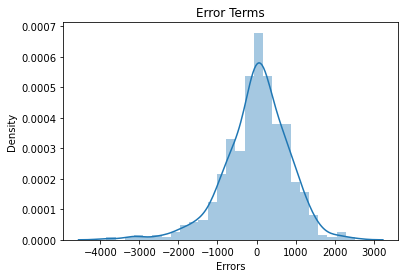

In [72]:
plot_res_dist(y_train, y_train_pred)

Errors are normally distribured here with mean 0. So everything seems to be fine

In [73]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8185359364498817

Inference:
R2 is almost same as we obtained for our final model

Predict values for test data set

In [74]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [75]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [76]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8159036088393238

Inference:
R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818).
This is a good R-squared value, hence we can see our model is performing good

Text(0, 0.5, 'y_test_pred')

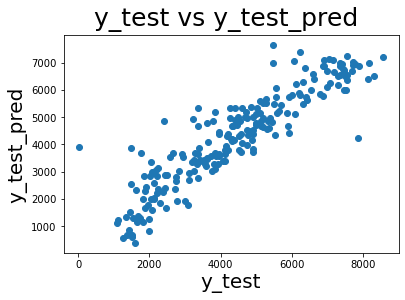

In [77]:
#Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 25)
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_test_pred', fontsize = 20)

Inference:
We can observe that variance of the residuals (error terms) is constant across predictions.
i.e error term does not vary much as the value of the predictor variable changes.

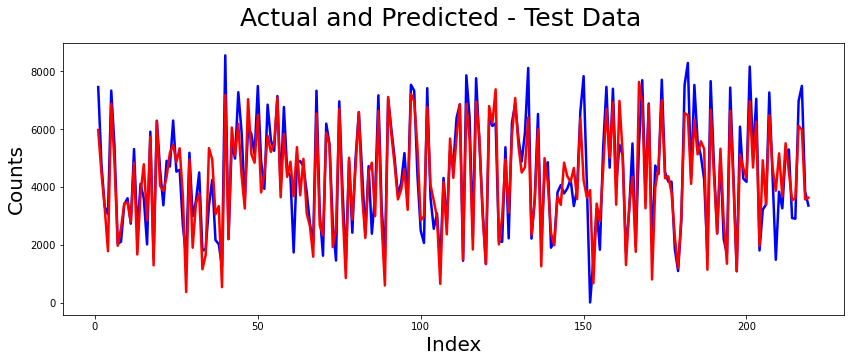

In [78]:
#Plot Test vs Predicted test values
#Function to plot Actual vs Predicted
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=25) 
    plt.xlabel('Index', fontsize=20) 
    plt.ylabel('Counts', fontsize=20)
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

Inference:
We can see predictions for test data is very close to actuals

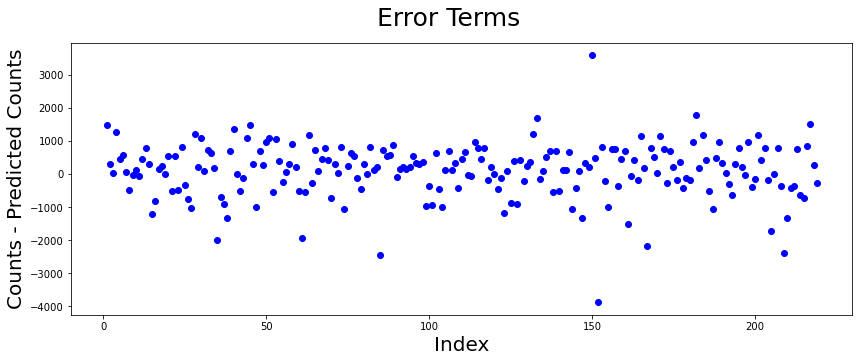

In [79]:
#Plotting error terms for test data
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=25) 
    plt.xlabel('Index', fontsize=20)
    plt.ylabel('Counts - Predicted Counts', fontsize=20)
plot_err_terms(y_test,y_test_pred)

Inference:
The error terms are randomly distributed

Intrepretting the Model

In [80]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.33e-179
Time:                        11:47:10   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

Interepretation of results:

Analysing the above model is:

Company should focus on expanding business during Spring.

Company should focus on expanding business during  July.

There would be less bookings during Weather bad like Light Snow or Rain.

Conclusion

Significant variables to predict the demand for shared bikes

Year

temp

Season

months(July, September)

Sunday

weathersit( Light Snow, Mist + Cloudy)